In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stat
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('C:/Users/sebam/Downloads/python/Titanic dataset/Titanic dataset.csv')

In [3]:
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [5]:
data.shape

(891, 12)

In [6]:
data.tail(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
881,882,0,3,"Markun, Mr. Johann",male,33.0,0,0,349257,7.8958,NaN,S
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.7500,NaN,Q


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Missing data found in columns Age, Cabin, Embarked

In [8]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


We have found outliers in Age and Fare

In [9]:
data.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


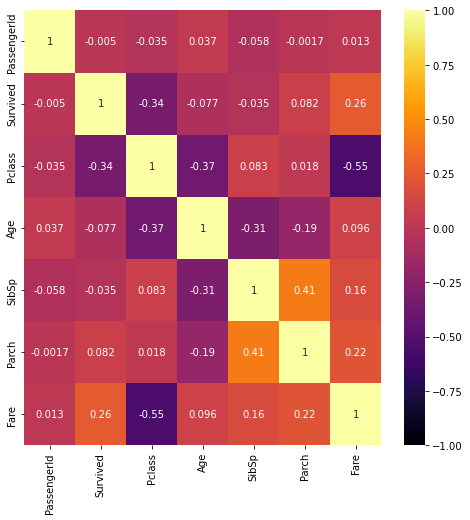

In [10]:
plt.figure(figsize=(8,8))
sns.heatmap(data.corr(), vmax=1,vmin=-1,annot=True,cmap='inferno')
plt.show()

#### Explore the target variable

0    549
1    342
Name: Survived, dtype: int64


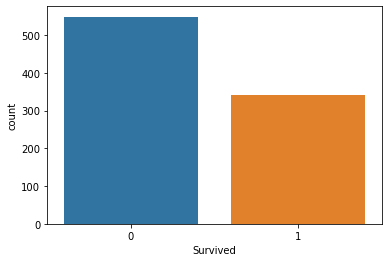

In [11]:
print(data['Survived'].value_counts())
sns.countplot(data['Survived'])
plt.show()

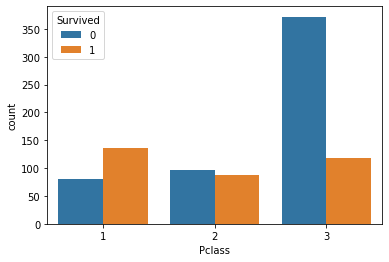

Pclass  Survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
Name: Pclass, dtype: int64

In [12]:
sns.countplot(x=data['Pclass'],hue=data['Survived'])
plt.show()
data.groupby(by=['Pclass','Survived'])['Pclass'].count()

In [13]:
grpdata=data.groupby(by=['Pclass','Survived'])['Pclass'].count()
a= grpdata[1][1]/(grpdata[1][0]+grpdata[1][1])*100
b= grpdata[2][1]/(grpdata[2][0]+grpdata[2][1])*100
c= grpdata[3][1]/(grpdata[3][0]+grpdata[3][1])*100
print('% survived in 1st class ', a)
print('% survived in 2nd class ', b)
print('% survived in 3rd class ', c)

% survived in 1st class  62.96296296296296
% survived in 2nd class  47.28260869565217
% survived in 3rd class  24.236252545824847


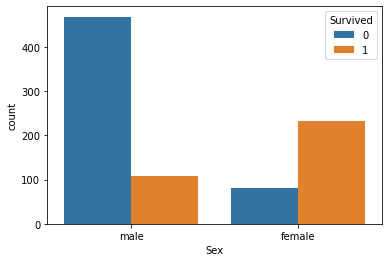

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Sex, dtype: int64

In [14]:
sns.countplot(x=data['Sex'],hue=data['Survived'])
plt.show()
data.groupby(by=['Sex','Survived'])['Sex'].count()

In [15]:
grpdata1=data.groupby(by=['Sex','Survived'])['Sex'].count()
a1= grpdata1['male'][1]/(grpdata1['male'][0]+grpdata1['male'][1])*100
b1= grpdata1['female'][1]/(grpdata1['female'][0]+grpdata1['female'][1])*100
print('% survival of Males ', a1)
print('% survival of Females ', b1)

% survival of Males  18.890814558058924
% survival of Females  74.20382165605095


In [16]:
from statsmodels.stats.weightstats import ztest

In [17]:
samplea=data[data['Survived']==0]['Fare']
sampleb=data[data['Survived']==1]['Fare']
samplea

0       7.2500
4       8.0500
5       8.4583
6      51.8625
7      21.0750
        ...   
884     7.0500
885    29.1250
886    13.0000
888    23.4500
890     7.7500
Name: Fare, Length: 549, dtype: float64

###### H0= Two samples are same
###### H1= Two samples are different

In [18]:
z_val, p_val= ztest(x1=samplea,x2=sampleb)
alpha=0.05
print('Z score %2f\nP value %f' %(z_val,p_val))
if p_val>alpha:
    print('H0= Two samples are same')
else:
    print('H1= Two samples are different')

Z score -7.939192
P value 0.000000
H1= Two samples are different


### Detect and Treat the missing value

In [19]:
((data.isnull().sum()/data.isnull().count())*100)

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [20]:
data[data['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [21]:
data.groupby(by=['Pclass','Embarked'])['Fare'].median()

Pclass  Embarked
1       C           78.2667
        Q           90.0000
        S           52.0000
2       C           24.0000
        Q           12.3500
        S           13.5000
3       C            7.8958
        Q            7.7500
        S            8.0500
Name: Fare, dtype: float64

In [22]:
data['Embarked'].fillna('C',inplace= True)

In [23]:
data[data['Age'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


In [24]:
data['Age'].median()

28.0

In [25]:
data['Age'].fillna(28.0,inplace= True)

In [26]:
# Since 77% of data is missing in cabin we can delete this column
del data['Cabin']

In [27]:
((data.isnull().sum()/data.isnull().count())*100)

PassengerId    0.0
Survived       0.0
Pclass         0.0
Name           0.0
Sex            0.0
Age            0.0
SibSp          0.0
Parch          0.0
Ticket         0.0
Fare           0.0
Embarked       0.0
dtype: float64

### Outlier Detection and Treatment

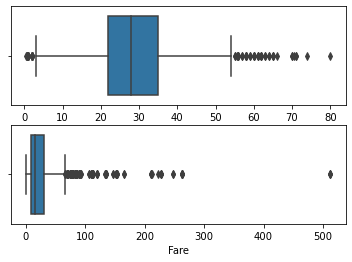

In [28]:
plt.subplot(2,1,1)
sns.boxplot(data['Age'])
plt.subplot(2,1,2)
sns.boxplot(data['Fare'])
plt.show()

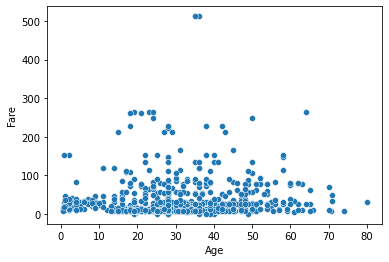

In [29]:
sns.scatterplot(x=data['Age'],y=data['Fare'])
plt.show()

In [30]:
data[data['Fare']>500]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,C


In [31]:
data[(data['Pclass']==1)&(data['Embarked']=='C')]['Fare'].median()

79.2

In [32]:
data.drop(index=data[data['Fare']>500].index,inplace=True)

<AxesSubplot:xlabel='Fare'>

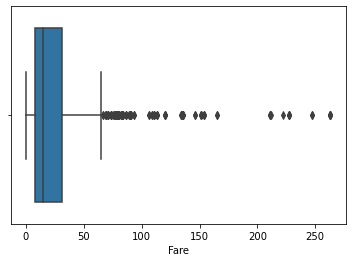

In [33]:
sns.boxplot(data['Fare'])

### Feature selection

In [34]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [35]:
#drop the columns we don't need
data.drop(columns=['PassengerId','Name','Ticket'],inplace=True)

In [36]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


### Feature Engineering

In [37]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()

In [38]:
#to convert the data in 0 and 1
data['Sex']=le.fit_transform(data['Sex'])

In [39]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,S
1,1,1,0,38.0,1,0,71.2833,C
2,1,3,0,26.0,0,0,7.9250,S
3,1,1,0,35.0,1,0,53.1000,S
4,0,3,1,35.0,0,0,8.0500,S


In [40]:
#convert the last object column into dummies
data= pd.get_dummies(data,drop_first=True)

In [41]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,0,3,1,22.0,1,0,7.2500,0,1
1,1,1,0,38.0,1,0,71.2833,0,0
2,1,3,0,26.0,0,0,7.9250,0,1
3,1,1,0,35.0,1,0,53.1000,0,1
4,0,3,1,35.0,0,0,8.0500,0,1


### Train Split Test


In [42]:
x= data.drop(columns=['Survived'])
y= data['Survived']

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
x_train, x_test, y_train, y_test= train_test_split(x,y,stratify=y,train_size=0.9)

In [45]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(799, 8) (89, 8) (799,) (89,)


### Logistic Regression Model

In [46]:
from sklearn.linear_model import LogisticRegression
model= LogisticRegression()

In [47]:
model.fit(x_train,y_train)

LogisticRegression()

In [48]:
y_pred= model.predict(x_test)

In [49]:
y_pred

array([0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       1], dtype=int64)

In [50]:
pd.DataFrame({'Actual':y_test,'Predicted':y_pred})

,Actual,Predicted
859,0,0
847,0,0
87,0,0
370,1,1
619,0,0
...,...,...
839,1,1
488,0,0
614,0,0
386,0,0


In [51]:
y_pred_soft= model.predict_proba(x_test)

In [52]:
y_pred_soft[:,1]

array([0.14623268, 0.11603455, 0.09982036, 0.56250954, 0.2660498 ,
       0.82096723, 0.09259531, 0.13063948, 0.06265049, 0.08344749,
       0.9583061 , 0.67562115, 0.87452418, 0.00810088, 0.34326629,
       0.90417475, 0.06446005, 0.00810088, 0.52744863, 0.64864352,
       0.14863082, 0.78832465, 0.2734911 , 0.94361308, 0.08058609,
       0.24610829, 0.09982161, 0.25147508, 0.62540231, 0.36471171,
       0.14623268, 0.81813816, 0.21098558, 0.35279958, 0.0932018 ,
       0.0750813 , 0.81084441, 0.23058864, 0.03865836, 0.89462757,
       0.81657041, 0.62432539, 0.95252877, 0.92720633, 0.38545097,
       0.09003548, 0.10328946, 0.13563509, 0.91091798, 0.38163444,
       0.21596069, 0.2173923 , 0.8498241 , 0.14622517, 0.22476789,
       0.44441079, 0.51121928, 0.08696821, 0.59508959, 0.50402949,
       0.64860062, 0.86318366, 0.27681854, 0.92548611, 0.67882207,
       0.51826972, 0.13066176, 0.12226757, 0.39242058, 0.08634114,
       0.53834194, 0.17823069, 0.9538155 , 0.13953224, 0.09738

In [53]:
pd.DataFrame({'Actual':y_test,'Predicted':y_pred, 'Soft Prediction':y_pred_soft[:,1]}).head(20)

,Actual,Predicted,Soft Prediction
859,0,0,0.146233
847,0,0,0.116035
87,0,0,0.099820
370,1,1,0.562510
619,0,0,0.266050
546,1,1,0.820967
0,0,0,0.092595
682,0,0,0.130639
50,0,0,0.062650
267,1,0,0.083447


### validation

In [54]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,confusion_matrix

In [55]:
def validation(test,pred):
    print('Confusion matrix \n', confusion_matrix(test,pred))
    print('Accuracy: ', accuracy_score(test,pred))
    print('Recall :',recall_score(test,pred))
    print('Precision :', precision_score(test,pred))
    print('F1 score :', f1_score(test,pred))

In [56]:
validation(y_test,y_pred)

Confusion matrix 
 [[47  8]
 [ 6 28]]
Accuracy:  0.8426966292134831
Recall : 0.8235294117647058
Precision : 0.7777777777777778
F1 score : 0.7999999999999999


In [57]:
model.score(x_test,y_test)

0.8426966292134831

In [58]:
#ROC currve
from sklearn.metrics import roc_auc_score, roc_curve
auc= roc_auc_score(y_test,y_pred)

In [59]:
auc

0.8390374331550802

In [60]:
fpr, tpr, threshold= roc_curve(y_test,y_pred_soft[:,1])

In [61]:
pd.DataFrame({'FPR':fpr,'TPR':tpr,'Threshold':threshold})

,FPR,TPR,Threshold
0,0.000000,0.000000,1.958306
1,0.000000,0.029412,0.958306
2,0.000000,0.647059,0.648644
3,0.072727,0.647059,0.611346
4,0.072727,0.676471,0.610848
5,0.090909,0.676471,0.595090
6,0.090909,0.705882,0.562510
7,0.109091,0.705882,0.538342
8,0.109091,0.735294,0.527449
9,0.109091,0.794118,0.518270


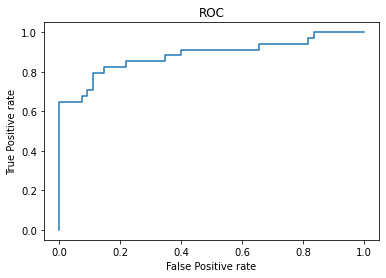

Area under the curve 0.8390374331550802


In [62]:
plt.plot(fpr,tpr)
plt.title('ROC')
plt.xlabel('False Positive rate')
plt.ylabel('True Positive rate')
plt.show()
print('Area under the curve', auc)

In [63]:
## changing the classifier cutoff or threshold
thres= 0.55
y_pred_55= (y_pred_soft[:,1]>thres).astype(int)

In [64]:
y_pred_55

array([0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1])

In [65]:
validation(y_test,y_pred_55)

Confusion matrix 
 [[50  5]
 [10 24]]
Accuracy:  0.8314606741573034
Recall : 0.7058823529411765
Precision : 0.8275862068965517
F1 score : 0.7619047619047619


In [173]:
thres= 0.60
y_pred_60= (y_pred_soft[:,1]>thres).astype(int)

In [174]:
validation(y_test,y_pred_60)

Confusion matrix 
 [[51  4]
 [11 23]]
Accuracy:  0.8314606741573034
Recall : 0.6764705882352942
Precision : 0.8518518518518519
F1 score : 0.7540983606557378


### KNN Classifier

In [68]:
x

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,3,1,22.0,1,0,7.2500,0,1
1,1,0,38.0,1,0,71.2833,0,0
2,3,0,26.0,0,0,7.9250,0,1
3,1,0,35.0,1,0,53.1000,0,1
4,3,1,35.0,0,0,8.0500,0,1
...,...,...,...,...,...,...,...,...
886,2,1,27.0,0,0,13.0000,0,1
887,1,0,19.0,0,0,30.0000,0,1
888,3,0,28.0,1,2,23.4500,0,1
889,1,1,26.0,0,0,30.0000,0,0


In [69]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 888, dtype: int64

In [70]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()

In [71]:
x_train_s = sc.fit_transform(x_train)
x_test_s = sc.fit_transform(x_test)

In [72]:
x_train_s

array([[ 0.82355655,  0.73450598, -0.94650393, ..., -0.56437316,
        -0.31229389,  0.61448044],
       [ 0.82355655,  0.73450598, -0.04095828, ..., -0.54921602,
         3.20211198, -1.62739111],
       [-0.37721295,  0.73450598, -0.87104179, ...,  1.04531498,
        -0.31229389,  0.61448044],
       ...,
       [ 0.82355655,  0.73450598, -1.55020103, ...,  0.02402696,
        -0.31229389,  0.61448044],
       [-1.57798244,  0.73450598, -0.11642042, ..., -0.06489572,
        -0.31229389, -1.62739111],
       [ 0.82355655,  0.73450598, -0.11642042, ..., -0.56619202,
        -0.31229389,  0.61448044]])

In [73]:
from sklearn.neighbors import KNeighborsClassifier

In [74]:
model_knn= KNeighborsClassifier(n_neighbors=5)

In [75]:
model_knn.fit(x_train_s,y_train)

KNeighborsClassifier()

In [76]:
y_pred_knn= model_knn.predict(x_test_s)

In [77]:
pd.DataFrame({"Actual":y_test,'Pred LR':y_pred,'Pred KNN':y_pred_knn}).head(20)

,Actual,Pred LR,Pred KNN
859,0,0,0
847,0,0,0
87,0,0,0
370,1,1,0
619,0,0,0
546,1,1,1
0,0,0,0
682,0,0,0
50,0,0,0
267,1,0,0


In [78]:
validation(y_test,y_pred_knn)

Confusion matrix 
 [[47  8]
 [10 24]]
Accuracy:  0.797752808988764
Recall : 0.7058823529411765
Precision : 0.75
F1 score : 0.7272727272727272


In [79]:
y_pred_knn_soft = model_knn.predict_proba(x_test_s)

In [80]:
pd.DataFrame({"Actual":y_test,'Pred KNN':y_pred_knn,'Soft Pred KNN':y_pred_knn_soft[:,1]}).head(20)

,Actual,Pred KNN,Soft Pred KNN
859,0,0,0.2
847,0,0,0.0
87,0,0,0.4
370,1,0,0.4
619,0,0,0.2
546,1,1,0.8
0,0,0,0.2
682,0,0,0.0
50,0,0,0.0
267,1,0,0.0


In [81]:
fpr_knn,tpr_knn,threshold_knn= roc_curve(y_test,y_pred_knn_soft[:,1])

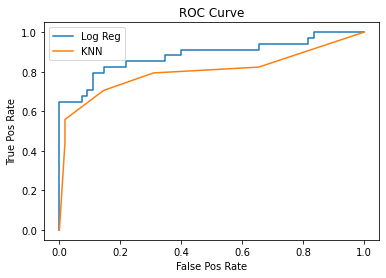

Area under the curve Log Reg:  0.8390374331550802
Area under the curve KNN:  0.7802139037433156


In [82]:
plt.plot(fpr,tpr)
plt.plot(fpr_knn,tpr_knn)
plt.title('ROC Curve')
plt.xlabel('False Pos Rate')
plt.ylabel('True Pos Rate')
plt.legend(['Log Reg','KNN'])
plt.show()
print('Area under the curve Log Reg: ',roc_auc_score(y_test,y_pred))
print('Area under the curve KNN: ',roc_auc_score(y_test,y_pred_knn))

In [83]:
params= {'n_neighbors':[3,5,7,9,11,13]}

In [84]:
from sklearn.model_selection import GridSearchCV
gscv= GridSearchCV(estimator=KNeighborsClassifier(),
                  param_grid=params,
                  scoring='accuracy',
                  cv=2,
                  verbose=3)

In [85]:
gscv.fit(x_train_s,y_train)

Fitting 2 folds for each of 6 candidates, totalling 12 fits
[CV 1/2] END .....................n_neighbors=3;, score=0.797 total time=   0.0s
[CV 2/2] END .....................n_neighbors=3;, score=0.797 total time=   0.0s
[CV 1/2] END .....................n_neighbors=5;, score=0.823 total time=   0.0s
[CV 2/2] END .....................n_neighbors=5;, score=0.794 total time=   0.0s
[CV 1/2] END .....................n_neighbors=7;, score=0.818 total time=   0.0s
[CV 2/2] END .....................n_neighbors=7;, score=0.787 total time=   0.0s
[CV 1/2] END .....................n_neighbors=9;, score=0.812 total time=   0.0s
[CV 2/2] END .....................n_neighbors=9;, score=0.794 total time=   0.0s
[CV 1/2] END ....................n_neighbors=11;, score=0.825 total time=   0.0s
[CV 2/2] END ....................n_neighbors=11;, score=0.799 total time=   0.0s
[CV 1/2] END ....................n_neighbors=13;, score=0.820 total time=   0.0s
[CV 2/2] END ....................n_neighbors=13;,

GridSearchCV(cv=2, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7, 9, 11, 13]},
             scoring='accuracy', verbose=3)

In [86]:
gscv.best_params_

{'n_neighbors': 11}

In [87]:
gscv.score(x_test_s,y_test)

0.8202247191011236

In [88]:
print('Area under the curve KNN: ',roc_auc_score(y_test,y_pred_knn))

Area under the curve KNN:  0.7802139037433156


### Naive Baye's Model

In [89]:
from sklearn.naive_bayes import GaussianNB

In [90]:
model_nb= GaussianNB()

In [91]:
model_nb.fit(x_train,y_train)

GaussianNB()

In [92]:
model_nb.score(x_test,y_test)

0.8314606741573034

In [93]:
y_pred_nb= model_nb.predict(x_test)

In [96]:
validation(y_test,y_pred_nb)

Confusion matrix 
 [[47  8]
 [ 7 27]]
Accuracy:  0.8314606741573034
Recall : 0.7941176470588235
Precision : 0.7714285714285715
F1 score : 0.782608695652174


In [97]:
y_pred_nb_soft = model_nb.predict_proba(x_test)

In [98]:
#pd.DataFrame({"Actual":y_test,'Pred NBM':y_pred_nbm,'Soft Pred nbm':y_pred_nbm_soft[:,1]}).head(20)

In [99]:
fpr_nb,tpr_nb,threshold_nb= roc_curve(y_test,y_pred_nb_soft[:,1])

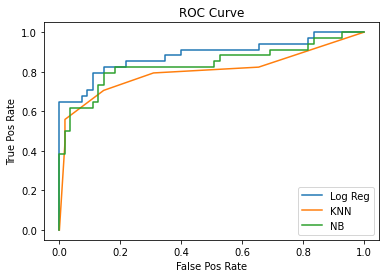

Area under the curve Log Reg:  0.8390374331550802
Area under the curve KNN:  0.7802139037433156
Area under the curve NBM:  0.8243315508021389


In [100]:
plt.plot(fpr,tpr)
plt.plot(fpr_knn,tpr_knn)
plt.plot(fpr_nb,tpr_nb)
plt.title('ROC Curve')
plt.xlabel('False Pos Rate')
plt.ylabel('True Pos Rate')
plt.legend(['Log Reg','KNN','NB'])
plt.show()
print('Area under the curve Log Reg: ',roc_auc_score(y_test,y_pred))
print('Area under the curve KNN: ',roc_auc_score(y_test,y_pred_knn))
print('Area under the curve NBM: ',roc_auc_score(y_test,y_pred_nb))

### Decision Tree Classifier

In [101]:
from sklearn.tree import DecisionTreeClassifier
model_dt= DecisionTreeClassifier()

In [102]:
params= {'criterion': ['gini','entropy'],
        'max_depth':[3,4,5,6]}

In [103]:
gscv= GridSearchCV(estimator= model_dt,
                  param_grid= params,
                  scoring= 'accuracy',
                  cv=3,
                  verbose=3)

In [104]:
gscv.fit(x_train,y_train)

Fitting 3 folds for each of 8 candidates, totalling 24 fits
[CV 1/3] END .......criterion=gini, max_depth=3;, score=0.831 total time=   0.0s
[CV 2/3] END .......criterion=gini, max_depth=3;, score=0.827 total time=   0.0s
[CV 3/3] END .......criterion=gini, max_depth=3;, score=0.767 total time=   0.0s
[CV 1/3] END .......criterion=gini, max_depth=4;, score=0.831 total time=   0.0s
[CV 2/3] END .......criterion=gini, max_depth=4;, score=0.789 total time=   0.0s
[CV 3/3] END .......criterion=gini, max_depth=4;, score=0.805 total time=   0.0s
[CV 1/3] END .......criterion=gini, max_depth=5;, score=0.835 total time=   0.0s
[CV 2/3] END .......criterion=gini, max_depth=5;, score=0.782 total time=   0.0s
[CV 3/3] END .......criterion=gini, max_depth=5;, score=0.805 total time=   0.0s
[CV 1/3] END .......criterion=gini, max_depth=6;, score=0.835 total time=   0.0s
[CV 2/3] END .......criterion=gini, max_depth=6;, score=0.831 total time=   0.0s
[CV 3/3] END .......criterion=gini, max_depth=6;,

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 4, 5, 6]},
             scoring='accuracy', verbose=3)

In [105]:
gscv.best_params_

{'criterion': 'gini', 'max_depth': 6}

In [106]:
model_dt = DecisionTreeClassifier(**gscv.best_params_)

In [107]:
model_dt.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=6)

In [108]:
y_pred_dt= model_dt.predict(x_test)

In [109]:
validation(y_test,y_pred_dt)

Confusion matrix 
 [[50  5]
 [10 24]]
Accuracy:  0.8314606741573034
Recall : 0.7058823529411765
Precision : 0.8275862068965517
F1 score : 0.7619047619047619


In [110]:
from sklearn import tree

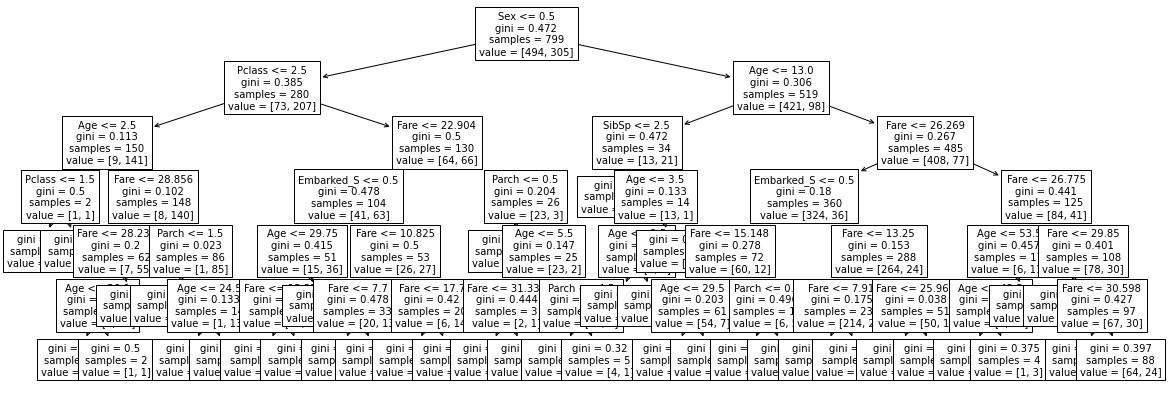

In [111]:
plt.figure(figsize=(20,7))
tree.plot_tree(model_dt,feature_names=x_test.columns,fontsize=10)
plt.show()

## BAGGING

### Random Forest

In [112]:
from sklearn.ensemble import RandomForestClassifier

In [113]:
model_rf= RandomForestClassifier()

In [114]:
params= {'n_estimators':[200,250,300,400],
         'criterion':['gini','entropy'],
         'max_depth':[4,5,6,7]}

In [115]:
gscv=GridSearchCV(estimator=model_rf,
                 param_grid=params,
                 scoring='accuracy',
                 cv=2,
                 verbose=3)

In [116]:
gscv.fit(x_train,y_train)

Fitting 2 folds for each of 32 candidates, totalling 64 fits
[CV 1/2] END criterion=gini, max_depth=4, n_estimators=200;, score=0.818 total time=   0.1s
[CV 2/2] END criterion=gini, max_depth=4, n_estimators=200;, score=0.825 total time=   0.1s
[CV 1/2] END criterion=gini, max_depth=4, n_estimators=250;, score=0.820 total time=   0.2s
[CV 2/2] END criterion=gini, max_depth=4, n_estimators=250;, score=0.822 total time=   0.2s
[CV 1/2] END criterion=gini, max_depth=4, n_estimators=300;, score=0.823 total time=   0.2s
[CV 2/2] END criterion=gini, max_depth=4, n_estimators=300;, score=0.822 total time=   0.2s
[CV 1/2] END criterion=gini, max_depth=4, n_estimators=400;, score=0.820 total time=   0.3s
[CV 2/2] END criterion=gini, max_depth=4, n_estimators=400;, score=0.820 total time=   0.3s
[CV 1/2] END criterion=gini, max_depth=5, n_estimators=200;, score=0.825 total time=   0.1s
[CV 2/2] END criterion=gini, max_depth=5, n_estimators=200;, score=0.825 total time=   0.1s
[CV 1/2] END criter

GridSearchCV(cv=2, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7],
                         'n_estimators': [200, 250, 300, 400]},
             scoring='accuracy', verbose=3)

In [117]:
gscv.best_score_

0.8285432330827067

In [118]:
gscv.best_params_

{'criterion': 'entropy', 'max_depth': 7, 'n_estimators': 250}

In [119]:
model_rf = RandomForestClassifier(**gscv.best_params_)

In [120]:
model_rf.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=7, n_estimators=250)

In [121]:
y_pred_rf= model_rf.predict(x_test)

In [122]:
validation(y_test,y_pred_rf)

Confusion matrix 
 [[54  1]
 [12 22]]
Accuracy:  0.8539325842696629
Recall : 0.6470588235294118
Precision : 0.9565217391304348
F1 score : 0.7719298245614036


## BOOSTING

### ADA Boosting

In [123]:
from sklearn.ensemble import AdaBoostClassifier

In [124]:
model_ada= AdaBoostClassifier()

In [125]:
params={'n_estimators':[100,150,200,250,300,400],
       'learning_rate':[0.001,0.1]}

In [126]:
gscv=GridSearchCV(estimator=model_ada,
                 param_grid=params,
                 scoring='accuracy',
                 cv=5,
                 verbose=3)

In [127]:
gscv.fit(x_train,y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5] END learning_rate=0.001, n_estimators=100;, score=0.819 total time=   0.0s
[CV 2/5] END learning_rate=0.001, n_estimators=100;, score=0.787 total time=   0.0s
[CV 3/5] END learning_rate=0.001, n_estimators=100;, score=0.800 total time=   0.0s
[CV 4/5] END learning_rate=0.001, n_estimators=100;, score=0.787 total time=   0.1s
[CV 5/5] END learning_rate=0.001, n_estimators=100;, score=0.736 total time=   0.0s
[CV 1/5] END learning_rate=0.001, n_estimators=150;, score=0.819 total time=   0.1s
[CV 2/5] END learning_rate=0.001, n_estimators=150;, score=0.787 total time=   0.1s
[CV 3/5] END learning_rate=0.001, n_estimators=150;, score=0.800 total time=   0.1s
[CV 4/5] END learning_rate=0.001, n_estimators=150;, score=0.787 total time=   0.1s
[CV 5/5] END learning_rate=0.001, n_estimators=150;, score=0.736 total time=   0.1s
[CV 1/5] END learning_rate=0.001, n_estimators=200;, score=0.819 total time=   0.1s
[CV 2/5] END le

GridSearchCV(cv=5, estimator=AdaBoostClassifier(),
             param_grid={'learning_rate': [0.001, 0.1],
                         'n_estimators': [100, 150, 200, 250, 300, 400]},
             scoring='accuracy', verbose=3)

In [128]:
gscv.best_score_

0.8047405660377358

In [129]:
gscv.best_params_

{'learning_rate': 0.1, 'n_estimators': 400}

In [130]:
model_ada = AdaBoostClassifier(**gscv.best_params_)

In [131]:
model_ada.fit(x_train,y_train)

AdaBoostClassifier(learning_rate=0.1, n_estimators=400)

In [132]:
y_pred_ada= model_ada.predict(x_test)

In [133]:
validation(y_test,y_pred_ada)

Confusion matrix 
 [[46  9]
 [ 8 26]]
Accuracy:  0.8089887640449438
Recall : 0.7647058823529411
Precision : 0.7428571428571429
F1 score : 0.7536231884057971


### Gradient Boosting

In [134]:
from sklearn.ensemble import GradientBoostingClassifier

In [135]:
model_gb= GradientBoostingClassifier()

In [136]:
params={'n_estimators':[100,150,200,250,300],
       'learning_rate':[0.001,0.01,0.1],
       'max_depth':[2,3,4,5]}

gscv=GridSearchCV(estimator=model_gb,
                 param_grid=params,
                 scoring='accuracy',
                 cv=5,
                 verbose=3)

In [137]:
gscv.fit(x_train,y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits
[CV 1/5] END learning_rate=0.001, max_depth=2, n_estimators=100;, score=0.619 total time=   0.0s
[CV 2/5] END learning_rate=0.001, max_depth=2, n_estimators=100;, score=0.619 total time=   0.0s
[CV 3/5] END learning_rate=0.001, max_depth=2, n_estimators=100;, score=0.619 total time=   0.0s
[CV 4/5] END learning_rate=0.001, max_depth=2, n_estimators=100;, score=0.619 total time=   0.0s
[CV 5/5] END learning_rate=0.001, max_depth=2, n_estimators=100;, score=0.616 total time=   0.0s
[CV 1/5] END learning_rate=0.001, max_depth=2, n_estimators=150;, score=0.619 total time=   0.0s
[CV 2/5] END learning_rate=0.001, max_depth=2, n_estimators=150;, score=0.619 total time=   0.0s
[CV 3/5] END learning_rate=0.001, max_depth=2, n_estimators=150;, score=0.619 total time=   0.0s
[CV 4/5] END learning_rate=0.001, max_depth=2, n_estimators=150;, score=0.619 total time=   0.0s
[CV 5/5] END learning_rate=0.001, max_depth=2, n_estimators=150;,

[CV 1/5] END learning_rate=0.001, max_depth=5, n_estimators=200;, score=0.619 total time=   0.2s
[CV 2/5] END learning_rate=0.001, max_depth=5, n_estimators=200;, score=0.619 total time=   0.2s
[CV 3/5] END learning_rate=0.001, max_depth=5, n_estimators=200;, score=0.619 total time=   0.1s
[CV 4/5] END learning_rate=0.001, max_depth=5, n_estimators=200;, score=0.619 total time=   0.2s
[CV 5/5] END learning_rate=0.001, max_depth=5, n_estimators=200;, score=0.616 total time=   0.2s
[CV 1/5] END learning_rate=0.001, max_depth=5, n_estimators=250;, score=0.713 total time=   0.2s
[CV 2/5] END learning_rate=0.001, max_depth=5, n_estimators=250;, score=0.738 total time=   0.2s
[CV 3/5] END learning_rate=0.001, max_depth=5, n_estimators=250;, score=0.756 total time=   0.2s
[CV 4/5] END learning_rate=0.001, max_depth=5, n_estimators=250;, score=0.781 total time=   0.2s
[CV 5/5] END learning_rate=0.001, max_depth=5, n_estimators=250;, score=0.717 total time=   0.2s
[CV 1/5] END learning_rate=0.0

[CV 2/5] END learning_rate=0.01, max_depth=4, n_estimators=300;, score=0.838 total time=   0.2s
[CV 3/5] END learning_rate=0.01, max_depth=4, n_estimators=300;, score=0.812 total time=   0.2s
[CV 4/5] END learning_rate=0.01, max_depth=4, n_estimators=300;, score=0.850 total time=   0.2s
[CV 5/5] END learning_rate=0.01, max_depth=4, n_estimators=300;, score=0.774 total time=   0.2s
[CV 1/5] END learning_rate=0.01, max_depth=5, n_estimators=100;, score=0.838 total time=   0.0s
[CV 2/5] END learning_rate=0.01, max_depth=5, n_estimators=100;, score=0.812 total time=   0.0s
[CV 3/5] END learning_rate=0.01, max_depth=5, n_estimators=100;, score=0.819 total time=   0.0s
[CV 4/5] END learning_rate=0.01, max_depth=5, n_estimators=100;, score=0.869 total time=   0.0s
[CV 5/5] END learning_rate=0.01, max_depth=5, n_estimators=100;, score=0.792 total time=   0.0s
[CV 1/5] END learning_rate=0.01, max_depth=5, n_estimators=150;, score=0.825 total time=   0.1s
[CV 2/5] END learning_rate=0.01, max_dep

[CV 4/5] END learning_rate=0.1, max_depth=4, n_estimators=150;, score=0.863 total time=   0.1s
[CV 5/5] END learning_rate=0.1, max_depth=4, n_estimators=150;, score=0.818 total time=   0.1s
[CV 1/5] END learning_rate=0.1, max_depth=4, n_estimators=200;, score=0.806 total time=   0.1s
[CV 2/5] END learning_rate=0.1, max_depth=4, n_estimators=200;, score=0.838 total time=   0.1s
[CV 3/5] END learning_rate=0.1, max_depth=4, n_estimators=200;, score=0.831 total time=   0.1s
[CV 4/5] END learning_rate=0.1, max_depth=4, n_estimators=200;, score=0.875 total time=   0.1s
[CV 5/5] END learning_rate=0.1, max_depth=4, n_estimators=200;, score=0.836 total time=   0.1s
[CV 1/5] END learning_rate=0.1, max_depth=4, n_estimators=250;, score=0.787 total time=   0.2s
[CV 2/5] END learning_rate=0.1, max_depth=4, n_estimators=250;, score=0.844 total time=   0.1s
[CV 3/5] END learning_rate=0.1, max_depth=4, n_estimators=250;, score=0.831 total time=   0.1s
[CV 4/5] END learning_rate=0.1, max_depth=4, n_est

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.001, 0.01, 0.1],
                         'max_depth': [2, 3, 4, 5],
                         'n_estimators': [100, 150, 200, 250, 300]},
             scoring='accuracy', verbose=3)

In [138]:
gscv.best_score_

0.8422641509433962

In [139]:
gscv.best_params_

{'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 200}

In [140]:
model_gb = GradientBoostingClassifier(**gscv.best_params_)

In [141]:
model_gb.fit(x_train,y_train)

GradientBoostingClassifier(learning_rate=0.01, max_depth=5, n_estimators=200)

In [142]:
y_pred_gb= model_gb.predict(x_test)

In [143]:
validation(y_test,y_pred_gb)

Confusion matrix 
 [[51  4]
 [ 9 25]]
Accuracy:  0.8539325842696629
Recall : 0.7352941176470589
Precision : 0.8620689655172413
F1 score : 0.7936507936507937


### Xtreme Gradient Boost

In [144]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [145]:
from xgboost import XGBClassifier

In [146]:
model_xgb= XGBClassifier()

In [147]:
params={'n_estimators':[150,200,250,300],
       'learning_rate':[0.001,0.01,0.1],
       'max_depth':[2,3,4,5]}

gscv=GridSearchCV(estimator=model_xgb,
                 param_grid=params,
                 scoring='accuracy',
                 cv=5,
                 verbose=3)

In [148]:
gscv.fit(x_train,y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV 1/5] END learning_rate=0.001, max_depth=2, n_estimators=150;, score=0.812 total time=   1.2s
[CV 2/5] END learning_rate=0.001, max_depth=2, n_estimators=150;, score=0.787 total time=   0.0s
[CV 3/5] END learning_rate=0.001, max_depth=2, n_estimators=150;, score=0.750 total time=   0.0s
[CV 4/5] END learning_rate=0.001, max_depth=2, n_estimators=150;, score=0.794 total time=   0.0s
[CV 5/5] END learning_rate=0.001, max_depth=2, n_estimators=150;, score=0.761 total time=   0.0s
[CV 1/5] END learning_rate=0.001, max_depth=2, n_estimators=200;, score=0.812 total time=   0.0s
[CV 2/5] END learning_rate=0.001, max_depth=2, n_estimators=200;, score=0.787 total time=   0.0s
[CV 3/5] END learning_rate=0.001, max_depth=2, n_estimators=200;, score=0.750 total time=   0.0s
[CV 4/5] END learning_rate=0.001, max_depth=2, n_estimators=200;, score=0.794 total time=   0.0s
[CV 5/5] END learning_rate=0.001, max_depth=2, n_estimators=200;,

[CV 1/5] END learning_rate=0.01, max_depth=2, n_estimators=200;, score=0.812 total time=   0.0s
[CV 2/5] END learning_rate=0.01, max_depth=2, n_estimators=200;, score=0.806 total time=   0.0s
[CV 3/5] END learning_rate=0.01, max_depth=2, n_estimators=200;, score=0.794 total time=   0.0s
[CV 4/5] END learning_rate=0.01, max_depth=2, n_estimators=200;, score=0.819 total time=   0.0s
[CV 5/5] END learning_rate=0.01, max_depth=2, n_estimators=200;, score=0.761 total time=   0.0s
[CV 1/5] END learning_rate=0.01, max_depth=2, n_estimators=250;, score=0.825 total time=   0.0s
[CV 2/5] END learning_rate=0.01, max_depth=2, n_estimators=250;, score=0.850 total time=   0.0s
[CV 3/5] END learning_rate=0.01, max_depth=2, n_estimators=250;, score=0.806 total time=   0.0s
[CV 4/5] END learning_rate=0.01, max_depth=2, n_estimators=250;, score=0.838 total time=   0.0s
[CV 5/5] END learning_rate=0.01, max_depth=2, n_estimators=250;, score=0.786 total time=   0.0s
[CV 1/5] END learning_rate=0.01, max_dep

[CV 4/5] END learning_rate=0.1, max_depth=2, n_estimators=250;, score=0.875 total time=   0.0s
[CV 5/5] END learning_rate=0.1, max_depth=2, n_estimators=250;, score=0.792 total time=   0.0s
[CV 1/5] END learning_rate=0.1, max_depth=2, n_estimators=300;, score=0.831 total time=   0.0s
[CV 2/5] END learning_rate=0.1, max_depth=2, n_estimators=300;, score=0.856 total time=   0.0s
[CV 3/5] END learning_rate=0.1, max_depth=2, n_estimators=300;, score=0.812 total time=   0.0s
[CV 4/5] END learning_rate=0.1, max_depth=2, n_estimators=300;, score=0.863 total time=   0.0s
[CV 5/5] END learning_rate=0.1, max_depth=2, n_estimators=300;, score=0.792 total time=   0.0s
[CV 1/5] END learning_rate=0.1, max_depth=3, n_estimators=150;, score=0.838 total time=   0.0s
[CV 2/5] END learning_rate=0.1, max_depth=3, n_estimators=150;, score=0.844 total time=   0.0s
[CV 3/5] END learning_rate=0.1, max_depth=3, n_estimators=150;, score=0.812 total time=   0.0s
[CV 4/5] END learning_rate=0.1, max_depth=3, n_est

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_ca...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                  

In [149]:
gscv.best_score_

0.8434827044025157

In [150]:
gscv.best_params_

{'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 250}

In [151]:
model_xgb = XGBClassifier(**gscv.best_params_)

In [152]:
model_xgb.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.01, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=5, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=250,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [153]:
y_pred_xgb= model_xgb.predict(x_test)

In [154]:
validation(y_test,y_pred_xgb)

Confusion matrix 
 [[50  5]
 [11 23]]
Accuracy:  0.8202247191011236
Recall : 0.6764705882352942
Precision : 0.8214285714285714
F1 score : 0.7419354838709677


### SVM

In [155]:
from sklearn.svm import SVC

In [156]:
model_svm = SVC()

In [157]:
params = {'C':[1,2,3],
         'kernel':['rbf','poly','sigmoid','linear'],
         'degree':[2,3,4]}

In [158]:
gscv = GridSearchCV(estimator=model_svm,
                   param_grid=params,
                   scoring='accuracy',
                   cv=2,
                   verbose=3)

In [159]:
gscv.fit(x_train_s,y_train)

Fitting 2 folds for each of 36 candidates, totalling 72 fits
[CV 1/2] END .........C=1, degree=2, kernel=rbf;, score=0.830 total time=   0.0s
[CV 2/2] END .........C=1, degree=2, kernel=rbf;, score=0.815 total time=   0.0s
[CV 1/2] END ........C=1, degree=2, kernel=poly;, score=0.765 total time=   0.0s
[CV 2/2] END ........C=1, degree=2, kernel=poly;, score=0.810 total time=   0.0s
[CV 1/2] END .....C=1, degree=2, kernel=sigmoid;, score=0.735 total time=   0.0s
[CV 2/2] END .....C=1, degree=2, kernel=sigmoid;, score=0.747 total time=   0.0s
[CV 1/2] END ......C=1, degree=2, kernel=linear;, score=0.797 total time=   0.0s
[CV 2/2] END ......C=1, degree=2, kernel=linear;, score=0.774 total time=   0.0s
[CV 1/2] END .........C=1, degree=3, kernel=rbf;, score=0.830 total time=   0.0s
[CV 2/2] END .........C=1, degree=3, kernel=rbf;, score=0.815 total time=   0.0s
[CV 1/2] END ........C=1, degree=3, kernel=poly;, score=0.787 total time=   0.0s
[CV 2/2] END ........C=1, degree=3, kernel=poly;

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [1, 2, 3], 'degree': [2, 3, 4],
                         'kernel': ['rbf', 'poly', 'sigmoid', 'linear']},
             scoring='accuracy', verbose=3)

In [160]:
gscv.best_score_

0.8285275689223057

In [161]:
gscv.best_params_

{'C': 2, 'degree': 2, 'kernel': 'rbf'}

In [162]:
model_svm= SVC(**gscv.best_params_)

In [163]:
model_svm.fit(x_train_s,y_train)

SVC(C=2, degree=2)

In [164]:
y_pred_svm = model_svm.predict(x_test_s)

In [165]:
validation(y_test,y_pred_svm)

Confusion matrix 
 [[54  1]
 [13 21]]
Accuracy:  0.8426966292134831
Recall : 0.6176470588235294
Precision : 0.9545454545454546
F1 score : 0.75


In [182]:
print('Accuracy\t \t',accuracy_score(y_test,y_pred))
print('KNN Accuracy\t \t',accuracy_score(y_test,y_pred_knn))
print("Naive baye's Accuracy\t",accuracy_score(y_test,y_pred_nb))
print("Decision Tree Accuracy\t",accuracy_score(y_test,y_pred_dt))
print("Random Forest Accuracy\t",accuracy_score(y_test,y_pred_rf))
print("Ada Boosting Accuracy\t",accuracy_score(y_test,y_pred_ada))
print("Gradient Boosting \t",accuracy_score(y_test,y_pred_gb))
print("XGB Accuracy\t \t",accuracy_score(y_test,y_pred_xgb))
print("SVM Accuracy \t \t",accuracy_score(y_test,y_pred_svm))

Accuracy	 	 0.8426966292134831
KNN Accuracy	 	 0.797752808988764
Naive baye's Accuracy	 0.8314606741573034
Decision Tree Accuracy	 0.8314606741573034
Random Forest Accuracy	 0.8539325842696629
Ada Boosting Accuracy	 0.8089887640449438
Gradient Boosting 	 0.8539325842696629
XGB Accuracy	 	 0.8202247191011236
SVM Accuracy 	 	 0.8426966292134831
